# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results, mouse_metadata, how='outer', on=['Mouse ID', 'Mouse ID'])

In [5]:
# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice.
mice_total = len(combined_data_df['Mouse ID'].unique())
print(f'Total no. of. mice: {mice_total}')

Total no. of. mice: 249


In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mice_with_duplicate_timepoints = combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)                                               

In [8]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = combined_data_df.loc[mice_with_duplicate_timepoints, 'Mouse ID'].unique()

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_ID_data = combined_data_df.loc[combined_data_df['Mouse ID'] == duplicate_mice_ID[0]]
duplicated_mice_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data_df.drop(duplicated_mice_ID_data.index)

In [11]:
# Checking the number of mice in the clean DataFrame.
mice_in_clean_df = len(clean_df['Mouse ID'].unique())
print(f'Number of mice in clean dataframe: {mice_in_clean_df}')

Number of mice in clean dataframe: 248


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen. 
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_regimen_df = clean_df.groupby('Drug Regimen')

#mean
mean = drug_regimen_df['Tumor Volume (mm3)'].mean()

#median

median = drug_regimen_df['Tumor Volume (mm3)'].median()

#variance
variance = drug_regimen_df['Tumor Volume (mm3)'].var()

#std deviation
std_deviation = drug_regimen_df['Tumor Volume (mm3)'].std()

#SEM
sem = drug_regimen_df['Tumor Volume (mm3)'].sem()


In [13]:
# Assemble the resulting series into a single summary DataFrame.
#Gather all statistical data in a df
statistical_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard deviation': std_deviation,
    'SEM': sem
})

print(f'Statistical data : \n {statistical_df}')

Statistical data : 
                    Mean     Median   Variance  Standard deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

statistical_results = drug_regimen_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
statistical_summary_df = statistical_results.rename(columns={
    'mean':'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard deviation',
    'sem': 'SEM'
})
statistical_summary_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Calculate number of mice per Drug Regimen
no_of_mice_per_regimen = drug_regimen_df['Mouse ID'].count().sort_values(ascending=False)
no_of_mice_per_regimen

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

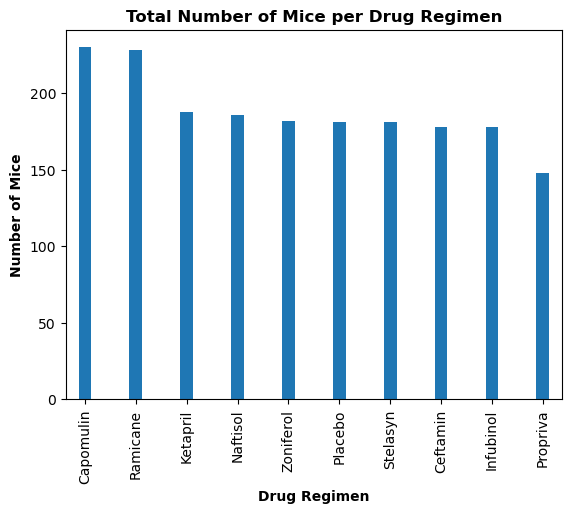

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_per_regimen_bar_chart = no_of_mice_per_regimen.plot(kind='bar', width=0.25)

# Set the title and label for x axis and y-axis
mice_per_regimen_bar_chart.set_title(label='Total Number of Mice per Drug Regimen', fontweight='bold')
mice_per_regimen_bar_chart.set_xlabel('Drug Regimen', fontweight='bold' )
mice_per_regimen_bar_chart.set_ylabel('Number of Mice', fontweight='bold')

# Present the bar chart
plt.show()

Text(0, 0.5, 'Number of Mice')

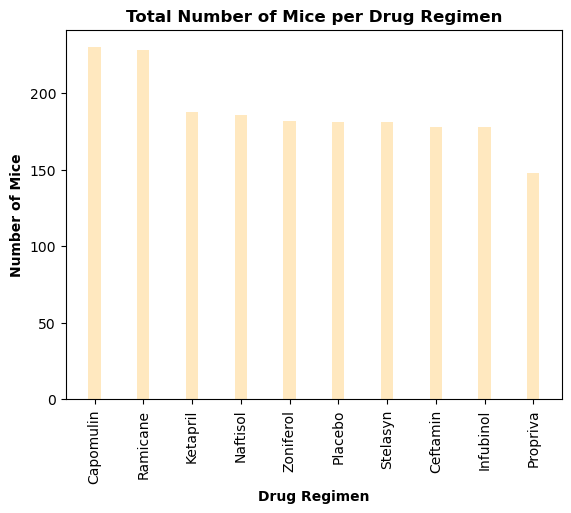

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(no_of_mice_per_regimen))
regimen_name = list(no_of_mice_per_regimen.index.values)

# Create bar chart
mice_per_regimen_bar_chart = plt.bar(x_axis, no_of_mice_per_regimen, color='orange', alpha=0.25, width=0.25)

# Set x and y label, title
plt.xticks(x_axis, regimen_name, rotation='vertical')
plt.title('Total Number of Mice per Drug Regimen', fontweight = 'bold')
plt.xlabel('Drug Regimen', fontweight = 'bold')
plt.ylabel('Number of Mice', fontweight = 'bold')

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_vs_male_mice = clean_df.groupby('Sex')['Sex'].count()
female_vs_male_mice

Sex
Female    922
Male      958
Name: Sex, dtype: int64

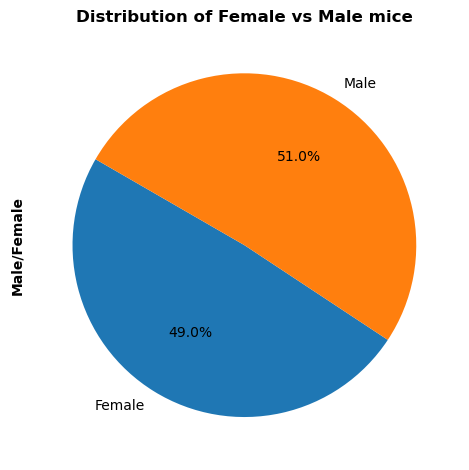

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_vs_male_mice_piechart = female_vs_male_mice.plot(kind='pie', autopct='%1.1f%%', startangle=150)

# Set x-axis and y-axis label, title
female_vs_male_mice_piechart.set_title(label='Distribution of Female vs Male mice', fontweight = 'bold')
female_vs_male_mice_piechart.set_ylabel('Male/Female', fontweight = 'bold')

plt.tight_layout()

# Plot the chart
plt.show()

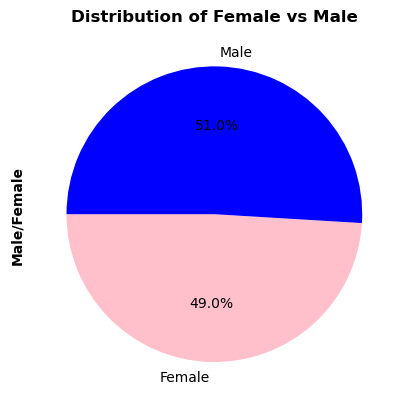

In [20]:
#Plot pie chart using Matplotlib

female_male_mice = female_vs_male_mice.index
colors = ['pink','blue']

# Create pie chart
female_male_piechart = plt.pie(female_vs_male_mice, labels=female_vs_male_mice.index, autopct="%1.1f%%", colors=colors, startangle=180)

# Set x/y label, title
plt.title('Distribution of Female vs Male', fontweight = 'bold')
plt.ylabel('Male/Female', fontweight = 'bold')

# Plot the chart
plt.show()



## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = clean_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]

# Reset index of the dataframe
final_tumor_volume_df = final_tumor_volume.reset_index()

In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume_list = []

# Calculate all the statistical elements like IQR and quantitatively determine if there are any potential outliers. 
for different_drug in treatment_regimen:

     # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == different_drug, 'Tumor Volume (mm3)']

    # add subset to tumor_vol_list 
    final_tumor_volume_list.append(final_tumor_volume)

    # Calculate the IQR and quantitatively 
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_volume.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) 
                  | (final_tumor_volume > upper_bound)]

     # Print out the result for different druts in the regimen
    print(f"{different_drug} Regimen")
    print(f"Final tumor volume(mm3) for {different_drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {different_drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {different_drug} is: {round(mean,2)}")
    print(f"Number of outliers for Capomulin is: {outliers.count()}")
    print(f"\n")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')


Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0


Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane above 54.31 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Capomulin is: 0


Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol above 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Capomulin is: 1


Outlier final tumor volume(mm3) is 36.32
Ceftamin Regimen
Final tumor volume(mm3) for Ceftamin below 25.36 could be outliers.
Final tumor volume(mm3) for Ceftamin above 87.67 could be outliers.
Average tumor volume(mm3) for Ceftamin is: 57.75
Number of outliers fo

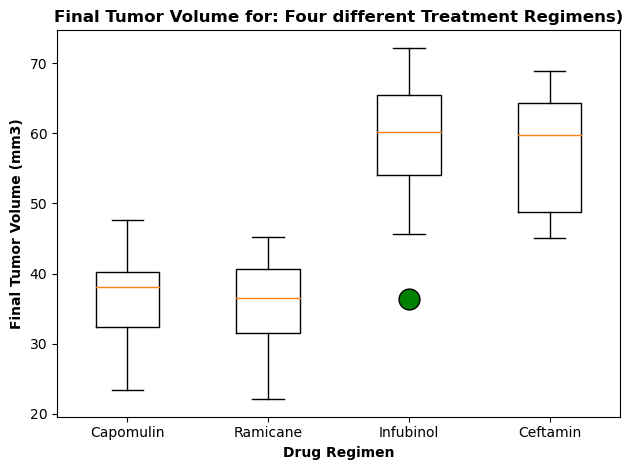

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

diagram1, final_tumor_bp = plt.subplots()
final_tumor_bp.boxplot(final_tumor_volume_list, labels=treatment_regimen, flierprops={'markerfacecolor':'g','markersize': 15})

# Set x/y label, title
final_tumor_bp.set_title('Final Tumor Volume for: Four different Treatment Regimens)', fontweight='bold')
final_tumor_bp.set_xlabel('Drug Regimen', fontweight='bold')
final_tumor_bp.set_ylabel('Final Tumor Volume (mm3)', fontweight='bold')

# Plot the boxplot chart
plt.tight_layout()
plt.show()

## Line and Scatter Plots

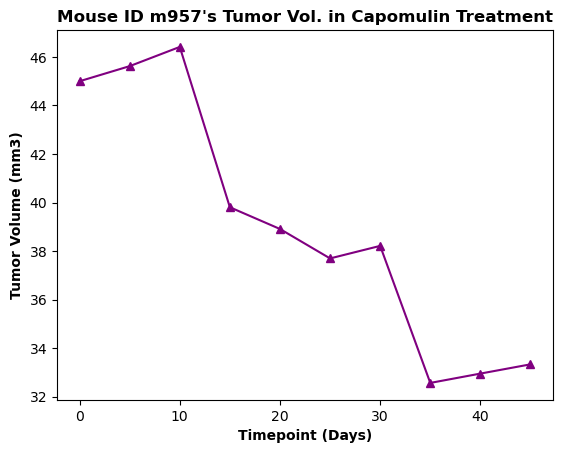

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

mouse_id = 'm957'
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]

# Generate a line plot
time_volume = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='^', color='purple')

# Set x and y label, title
plt.title(f"Mouse ID {mouse_id}'s Tumor Vol. in Capomulin Treatment", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')

# Plot the line chart
plt.show()


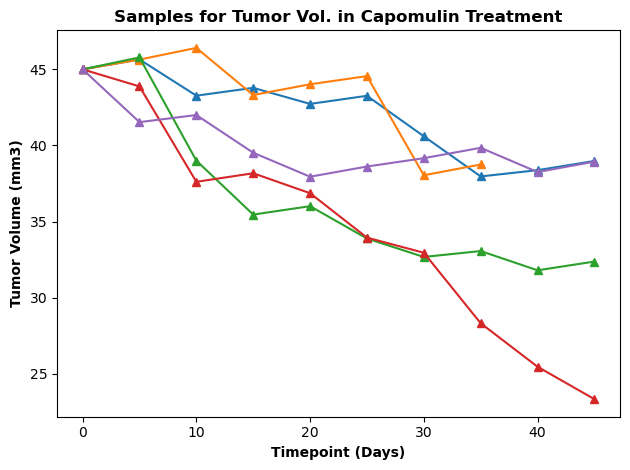

In [25]:
# Identify specific mouse ID and get data of the mouse id
mice_limit = Capomulin_df['Mouse ID'].unique()

for each in mice_limit[0:5]:
    mouse_limit_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == each]
    # Generate a line plot
    plt.plot(mouse_limit_df['Timepoint'], mouse_limit_df['Tumor Volume (mm3)'], marker='^')

# Set x-axis and y-axis label, title
plt.title(f"Samples for Tumor Vol. in Capomulin Treatment", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')

# Plot the line plot chart
plt.tight_layout()
plt.show()

# To close pyplot
plt.close()

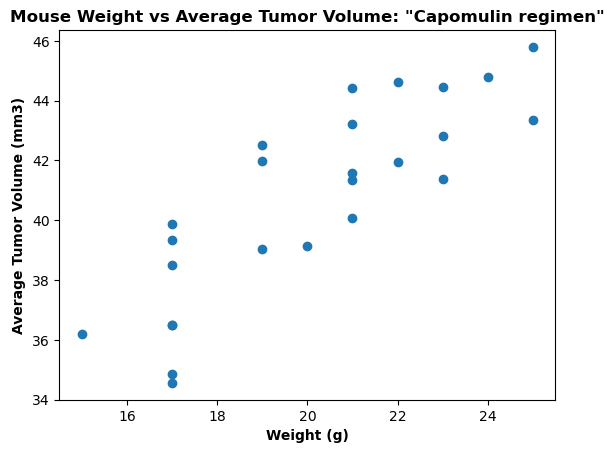

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Find average tumor volume vs. mouse weight for the Capomulin regimen. 

Capomulin_drug = Capomulin_df.groupby('Mouse ID').mean(numeric_only = True)
average_mice_weight =  Capomulin_drug['Weight (g)']
average_mice_tumor = Capomulin_drug['Tumor Volume (mm3)']

# Generate a scatter plot
plt.scatter(average_mice_weight, average_mice_tumor)

# Set ax and y label, title
plt.title('Mouse Weight vs Average Tumor Volume: "Capomulin regimen"', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

# Plot the scatter chart
plt.show()


## Correlation and Regression

The correlation between mouse weight and tumor vol is 0.84
The r-squared is: 0.71


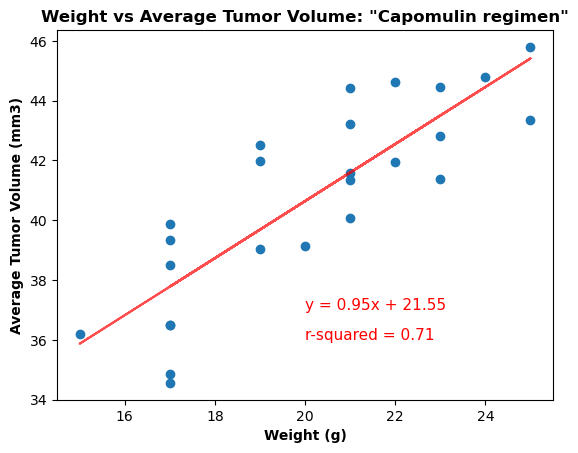

In [27]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Define x-axis and y-axis values
x_values = average_mice_weight
y_values = average_mice_tumor

# Calculate the correlation
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and tumor vol is {correlation}")

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared
r_squared = round(rvalue**2,2)
print(f"The r-squared is: {r_squared}")

# y = mx + b
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(line_equation,(20,37), fontsize=11, color="red")
plt.annotate(f'r-squared = {r_squared}', (20,36), fontsize=11, color="red")

# Define x-axis and y-axis labels, title
plt.title('Weight vs Average Tumor Volume: "Capomulin regimen"', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

# Plot the correlation
plt.show()

# To close pyplot
plt.close()
